In [1]:
## Data Initializing

In [1]:
import pandas as pd
import numpy as np
import data_handler as dh
import transport_graph as tg
import model

In [2]:
net_name = 'SiouxFalls_net.tntp'
trips_name = 'SiouxFalls_trips.tntp'

In [3]:
handler = dh.DataHandler()
graph_data = handler.GetGraphData(net_name, columns_order = np.array([0, 1, 2, 4]))
graph_data['graph_table']

,Init node,Term node,Capacity,Free Flow Time
0,1,2,25900.201172,6.0
1,1,3,23403.472656,4.0
2,2,1,25900.201172,6.0
3,2,6,4958.181152,5.0
4,3,1,23403.472656,4.0
5,3,4,17110.523438,4.0
6,3,12,23403.472656,4.0
7,4,3,17110.523438,4.0
8,4,5,17782.794922,2.0
9,4,11,4908.826660,6.0


In [4]:
graph_correspondences, total_od_flow = handler.GetGraphCorrespondences(trips_name)
total_od_flow

360600

In [5]:
graph = tg.TransportGraph(graph_data)

In [ ]:
gammas = np.logspace(1, -3, 9)
flows = []
times = []
iter_nums = []

for gamma in gammas:
    print('gamma = ' + str(gamma))
    result = model.model_solve(graph, graph_correspondences, total_od_flow, 
                               gamma = gamma, mu = 0.25, rho = 0.15, epsilon = 1e-5, max_iter = 5000, verbose = True)
    flows.append(result['flows'])
    times.append(result['times'])
    iter_nums.append(result['iter_num'])

gamma = 10.0
Oracles created...
Universal similar triangles function...
Iterations number: 10
Criterion / epsilon = 21653.2213089
Iterations number: 20
Criterion / epsilon = 44.0489486147
Success!  Iterations number: 27
gamma = 3.16227766017
Oracles created...
Universal similar triangles function...
Iterations number: 10
Criterion / epsilon = 50583.9017782
Iterations number: 20
Criterion / epsilon = 839.073256552
Iterations number: 30
Criterion / epsilon = 42.7633734932
Success!  Iterations number: 39
gamma = 1.0
Oracles created...
Universal similar triangles function...
Iterations number: 10
Criterion / epsilon = 454145.340367
Iterations number: 20
Criterion / epsilon = 21550.1018159
Iterations number: 30
Criterion / epsilon = 3346.85391224
Iterations number: 40
Criterion / epsilon = 1522.0758781
Iterations number: 50
Criterion / epsilon = 956.427408778
Iterations number: 60
Criterion / epsilon = 482.425074956
Iterations number: 70
Criterion / epsilon = 282.686631414
Iterations number

In [ ]:
for gamma in gammas[6:]:
    print('gamma = ' + str(gamma))
    result = model.model_solve(graph, graph_correspondences, total_od_flow, 
                               gamma = gamma, mu = 0.25, rho = 0.15, epsilon = 1e-5, max_iter = 5000, verbose = True)
    flows.append(result['flows'])
    times.append(result['times'])
    iter_nums.append(result['iter_num'])

In [20]:
import pickle

with open('flows.pickle', 'wb') as f:
    pickle.dump(flows, f)
with open('times.pickle', 'wb') as f:
    pickle.dump(times, f)
with open('iter_nums.pickle', 'wb') as f:
    pickle.dump(iter_nums, f)

In [23]:
def ReadAnswer(filename):
    with open(filename) as myfile:
        lines = myfile.readlines()
    lines = np.array(lines)[range(1, len(lines))]
    values_dict = {'flow': [], 'time': []}
    for line in lines:
        line = line.strip('[ \n]')
        nums = line.split(' \t')
        values_dict['flow'].append(float(nums[2]))
        values_dict['time'].append(float(nums[3]))
    return values_dict

In [32]:
values_dict = ReadAnswer('SiouxFalls_flow.tntp')
flow_star = values_dict['flow']
time_star = values_dict['time']
delta = []
for flow in flows:
    delta.append(np.linalg.norm(flow - flow_star, ord = 1) / np.linalg.norm(flow_star, ord = 1))

In [ ]:
epsilons = np.array([1e-5, 1e-4, 1e-3, 1e-2, 1e-1])
iter_nums_for_epsilons = []
for epsilon in epsilons:
    print('epsilon = ' + str(epsilon))
    result = model.model_solve(graph, graph_correspondences, total_od_flow, 
                               gamma = 0.5, mu = 0.25, rho = 0.15, epsilon = epsilon, max_iter = 5000, verbose = True)
    iter_nums_for_epsilons.append(result['iter_num'])

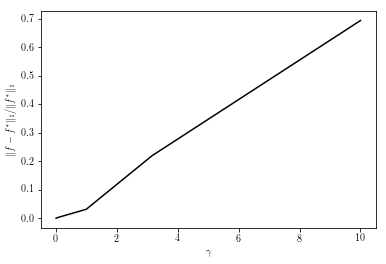

In [53]:
import matplotlib.pyplot as plt
plt.rc('text', usetex = True)
plt.plot(gammas[0:7], delta, 'black')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\|f - f^*\|_1 / \|f^*\|_1$')
#plt.axis([0, 6, 0, 20])
#plt.savefig('first_picture.png')
plt.show()

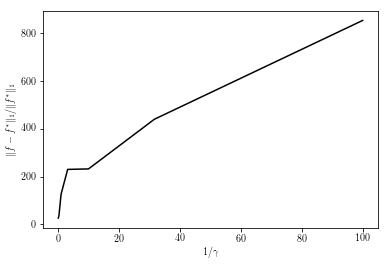

In [58]:
plt.rc('text', usetex = True)
plt.plot(1.0 / gammas[0:7], iter_nums, 'black')
plt.xlabel(r'$1 / \gamma$')
plt.ylabel(r'$\|f - f^*\|_1 / \|f^*\|_1$')
plt.show()

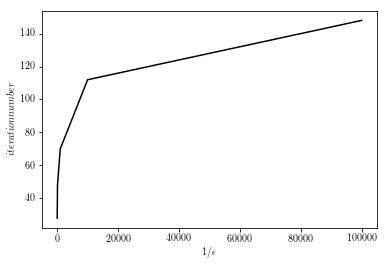

In [63]:
plt.rc('text', usetex = True)
plt.plot(1.0 / epsilons, iter_nums_for_epsilons, 'black')
plt.xlabel(r'$1 / \epsilon$')
plt.ylabel(r'$iteration number$')
plt.savefig('third_picture.png')
plt.show()